In [140]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [141]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [142]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

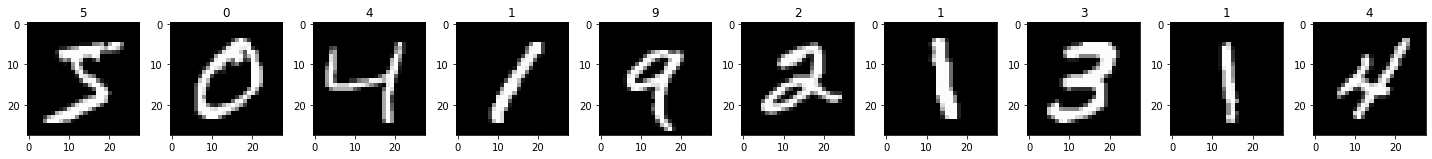

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,6), tight_layout=True)

for i in range(10):
  ax[i].imshow(x_train[i], cmap='gray')
  ax[i].set_title(y_train[i])

In [144]:
x_train = x_train.reshape(-1, 28*28) / 255.
x_test = x_test.reshape(-1, 28*28) / 255. 

In [145]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [146]:
latent_dim = 2

In [148]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_dim=28*28),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=latent_dim, activation='linear', name='encoded'),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=28*28, activation='linear', name='decoded')
])

In [149]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 512)               401920    
                                                                 
 dense_62 (Dense)            (None, 128)               65664     
                                                                 
 encoded (Dense)             (None, 2)                 258       
                                                                 
 dense_63 (Dense)            (None, 128)               384       
                                                                 
 dense_64 (Dense)            (None, 512)               66048     
                                                                 
 decoded (Dense)             (None, 784)               402192    
                                                                 
Total params: 936,466
Trainable params: 936,466
Non-tr

In [150]:
model.compile(optimizer='adam', loss='mse')

In [151]:
history = model.fit(x_train, x_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 10ms/step - loss: 0.0540 - val_loss: 0.0478
Epoch 2/30
375/375 [==============================] - 5s 12ms/step - loss: 0.0458 - val_loss: 0.0440
Epoch 3/30
375/375 [==============================] - 6s 15ms/step - loss: 0.0428 - val_loss: 0.0420
Epoch 4/30
375/375 [==============================] - 5s 12ms/step - loss: 0.0414 - val_loss: 0.0410
Epoch 5/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0405 - val_loss: 0.0400
Epoch 6/30
375/375 [==============================] - 4s 12ms/step - loss: 0.0397 - val_loss: 0.0396
Epoch 7/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0391 - val_loss: 0.0390
Epoch 8/30
375/375 [==============================] - 4s 12ms/step - loss: 0.0386 - val_loss: 0.0384
Epoch 9/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0381 - val_loss: 0.0382
Epoch 10/30
375/375 [==============================] - 5s 12ms/step - loss: 0.0378 - val_los

Text(0.5, 0, 'Epochs')

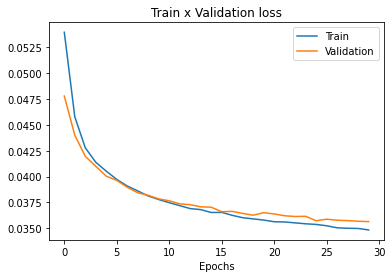

In [152]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.title('Train x Validation loss')
plt.xlabel('Epochs')

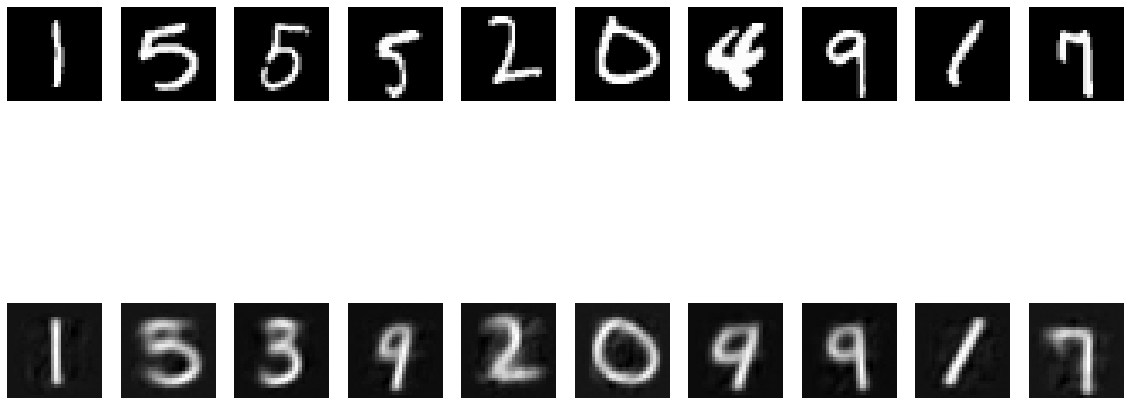

In [153]:
n_imgs = 10
random_imgs = np.random.choice(range(x_test.shape[1]), size=n_imgs)
img_true = x_test[random_imgs]
img_pred = model.predict(img_true)

plt.figure(figsize=(20, 10))
for i in range(n_imgs):
  plt.subplot(2, n_imgs, i + 1)
  plt.imshow(img_true[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(2, n_imgs, i + 1 + n_imgs)
  plt.imshow(img_pred[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

In [154]:
encoder = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(name='encoded').output)
x_test_encoded = encoder.predict(x_test)

In [155]:
x_test_encoded.shape

(10000, 2)

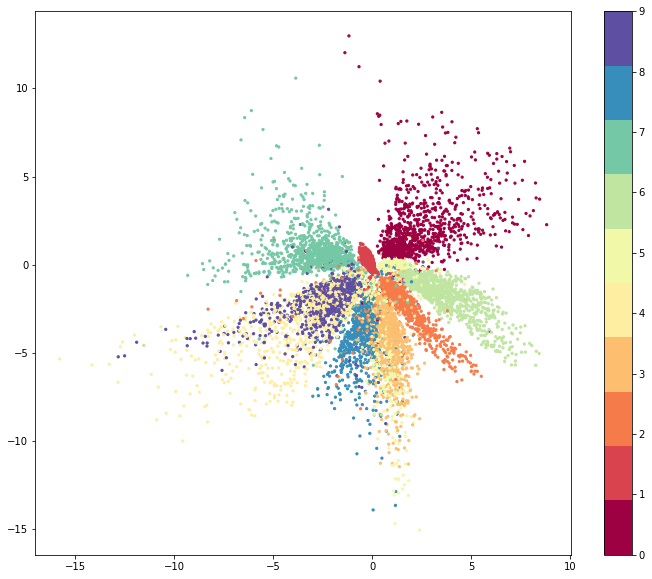

In [157]:
plt.figure(figsize=(12,10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap=plt.cm.get_cmap(name='Spectral', lut=10), s=5)
plt.colorbar()